# IMPORTING DEPENDENCIES :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# DATA COLLECTION & PRE-PROCESSING :

In [2]:
# loading the data from csv file to a pandas DataFram :
df = pd.read_csv("spam_Data.csv")

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# FIRST 5 ROWS OF THE DATASET :

In [4]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# LAST 5 ROWS OF THE DATASET :

In [5]:
df.tail(5)

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# REPLACE THE NULL VALUES WITH A NULL STRING :

In [6]:
data = df.where((pd.notnull(df)),'')

In [7]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# CHECKING THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME :

In [8]:
df.shape

(5572, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [50]:
df.describe().T

,count,unique,top,freq
Category,5572,2,1,4825
Message,5572,5169,"Sorry, I'll call later",30


In [ ]:
# Data Preprocessing :

In [51]:
df["filter"] = df["Category"].replace(to_replace=["ham", "spam"], value=[0,1])


In [52]:
df.head(10)


,Category,Message,filter
0,1,"Go until jurong point, crazy.. Available only ...",1
1,1,Ok lar... Joking wif u oni...,1
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,1,U dun say so early hor... U c already then say...,1
4,1,"Nah I don't think he goes to usf, he lives aro...",1
5,0,FreeMsg Hey there darling it's been 3 week's n...,0
6,1,Even my brother is not like to speak with me. ...,1
7,1,As per your request 'Melle Melle (Oru Minnamin...,1
8,0,WINNER!! As a valued network customer you have...,0
9,0,Had your mobile 11 months or more? U R entitle...,0


# Here we used where to replace the null value :


In [53]:
df1= (df.where((pd.notnull(df)),''))

In [54]:
df1

,Category,Message,filter
0,1,"Go until jurong point, crazy.. Available only ...",1
1,1,Ok lar... Joking wif u oni...,1
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,1,U dun say so early hor... U c already then say...,1
4,1,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0
5568,1,Will Ì_ b going to esplanade fr home?,1
5569,1,"Pity, * was in mood for that. So...any other s...",1
5570,1,The guy did some bitching but I acted like i'd...,1


,Message,filter
Category,,
0,747,747
1,4825,4825


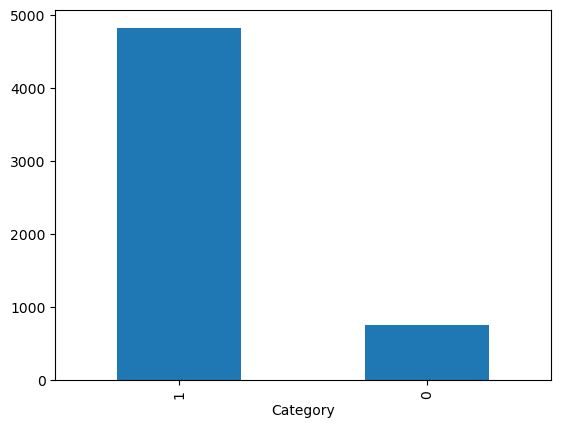

In [55]:
df1.Category.value_counts().plot.bar();
df1.groupby(['Category']).count()

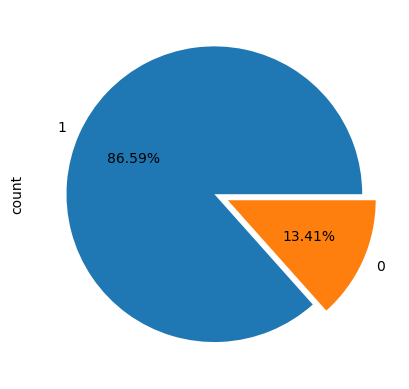

In [56]:
df1.Category.value_counts().plot.pie(autopct='%1.2f%%',radius=1,explode=[0,0.1]);


In [57]:
X=df1['Message']
Y=df1['Category']

In [58]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [59]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

# NAIVE BAYES :

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1['Message'],df1['filter'], train_size=.8)

In [64]:
Y_train


3393    1
1952    1
5482    0
5135    1
5256    1
       ..
4484    1
2621    1
314     1
3061    1
2152    1
Name: filter, Length: 4457, dtype: int64

In [65]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[0].shape

(7714,)

In [68]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,Y_train)

MultinomialNB()

# Evaluate your model on the test set

In [69]:
emails = [
   'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'You have a big offer in many market and you have 20% cash back ',
    'I ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times'
]
emails_count = v.transform(emails)

In [70]:
prediction =model.predict(emails_count)
print(prediction)
for i in prediction:
    if i != 1:
        print('ham mail')
    else:
        print('spam mail')

[1 0 1 1]
spam mail
ham mail
spam mail
spam mail


In [72]:
X_train_count = v.transform(X_train)
Accuracy_on_train =model.score(X_train_count, Y_train)
print(f'Accuracy on train :{Accuracy_on_train * (100)}%')

Accuracy on train :99.34933811981153%


In [73]:
X_test_count = v.transform(X_test)
Accuracy_on_test =model.score(X_test_count, Y_test)
print(f'Accuracy on test :{Accuracy_on_test*(100)}%')

Accuracy on test :99.01345291479821%


# LABEL ENCODING :

In [74]:
# label spam mail as 0; ham mail as 1;
df.loc[data['Category'] == 'spam','Category'] = 0
df.loc[data['Category'] == 'ham','Category'] = 1

# SPAM - 0
# HAM - 1

# separating the data as texts and label :

In [75]:
X = data['Message']
Y = data['Category']

In [76]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [77]:
print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


# SPLITING THE DATA INTO TRAINING DATA & TEST DATA :

In [13]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2 , stratify = Y , random_state=3)

In [14]:
X.shape

(5572,)

In [15]:
X_train.shape

(4457,)

In [16]:
X_test.shape

(1115,)

In [17]:
Y.shape

(5572,)

In [18]:
Y_train.shape

(4457,)

In [19]:
Y_test.shape

(1115,)

# FEATURE EXTRACTION :

In [79]:
# transform the text data to feature vectors that can be used as input to the logistic regression.
feature_extraction = TfidfVectorizer(min_df = 1,stop_words = 'english' , lowercase = 'True')

In [ ]:
# CONVERT Y_train AND Y_test VALUES AS INTEGER :

In [81]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [82]:
Y_train

4011    1
656     1
5214    0
1406    0
4108    1
       ..
3562    0
4999    1
257     1
241     1
402     1
Name: filter, Length: 4457, dtype: int32

In [83]:
Y_test

214     1
3846    0
3476    1
697     1
4198    0
       ..
443     1
1492    1
1913    1
4661    1
3267    1
Name: filter, Length: 1115, dtype: int32

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
model = Pipeline([
    ('convert_to_matix',CountVectorizer()),
    ('Classifier',SVC())
])

In [47]:
model.fit(X_train,Y_train)

Pipeline(steps=[('convert_to_matix', CountVectorizer()), ('Classifier', SVC())])

In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train and Y_test are pandas Series
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Y_train_encoded and Y_test_encoded are now arrays of integers


In [26]:
Y_train_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
Y_test_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [25]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

# Reshape is needed if you're encoding a single feature
Y_train_encoded = onehot_encoder.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_encoded = onehot_encoder.transform(Y_test.values.reshape(-1, 1))


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
Y_train_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
Y_test_encoded

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
onehot_encoder

OneHotEncoder(sparse=False, sparse_output=False)

In [32]:
vectorizer = TfidfVectorizer(lowercase=True)

In [33]:
X_train_features = vectorizer.fit_transform(X_train)


In [35]:
print(X_train_features_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# LOGISTIC REGRESSION :

In [84]:
model = LogisticRegression()

In [85]:
# training the logistic regression model with the training data :
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
# PREDICTION ON TRAINING DATA :

prediction_on_training_data = model.predict(x_train_features)